# Single Raman Spectrum Fitting

## Example 1: WS2 Nanotubes
Expt setting:

- Data collection time: 2025/5/9
- Sampling site: on WS2 flakes
- Exposure time: 1s
- Laser Power: 5%
- magnification: 100x
- Accumulation: 3
- Laser setting: central $\lambda$ = 520 cm^-1 ; laser = `532`nm ; grating: 1800 vis


Peak                 Position(cm⁻¹)  FWHM(cm⁻¹)    Intensity    Scale     
----------------------------------------------------------------------
E12g                 353.75          6.78          0.63         3.39      
A1g                  420.97          2.14          0.64         1.07      
2LA(M)               348.94          10.00         0.64         5.00      
2LA(M)-2E22g         295.08          10.00         0.07         5.00      
2LA(M)-E22g          323.82          20.00         0.19         10.00     
B1/u                 418.00          10.00         0.18         5.00      
Si                   521.69          20.00         0.11         10.00     

E12g(Γ)-A1g(Γ) separation: 67.22 cm⁻¹

Normalized Residual: 0.0558 (0 = perfect fit)


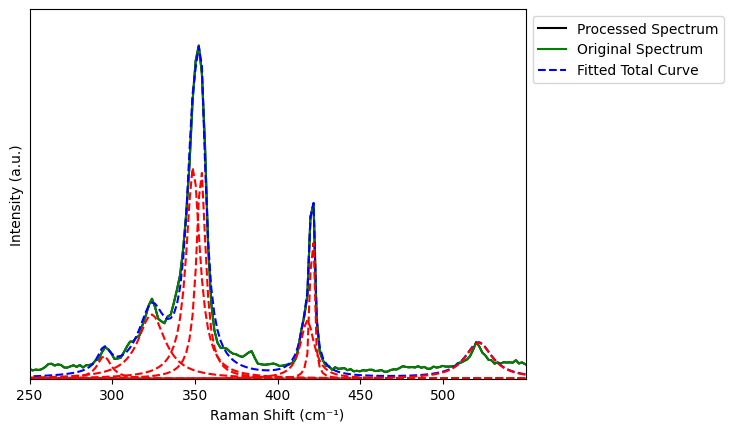

In [1]:
from renishawWiRE import WDFReader
from RamanFit import RamanFit # Import the class instead of the module

# Read data from .wdf file
filename = 'Raman Sample WS2 NT.wdf'
reader = WDFReader(filename)

# Focus on Raman shift = 300 to 780 1/cm (index 600 to 900 of the original data)
wavenumber = reader.xdata[300:780]  
spectra = reader.spectra[300:780]

# Instantiate the RamanFit class
raman_fit = RamanFit(spectra, wavenumber,
                     materials=['WS2'],         # Load materials, if no materials are provided, then WS2 is fitted
                     substrate='Si',            # Default substrate is Si (SiO2 and Si are )
                     normalize=True,            # Normalize your peak intensity
                     background_remove=False,   # If you Raman contains slanted intensity, use this, otherwise no
                     smoothing=False            # Smooth too noisy signal, only if needed 
                     )

# Update the fitting bounds 
bounds_dict = {
    '2LA(M)-2E22g' : ([290, 0, 0], [305, 5, 5]),
    '2LA(M)-E22g' : ([317, 0, 0], [325, 10, 10])
}
raman_fit.update_bounds(**bounds_dict)

# Remove Unecessary peaks
raman_fit.remove_peaks('4LA(M)','A1g(M)+LA(M)','A1g(M)-LA(M)','LA(M)')

# Perform the fitting
params, params_cov = raman_fit.fit_spectrum()

# Plot the results with an offset and scale
xlim = [250, 550]
raman_fit.plot_fit(params,                      # The Lorentzian parameters fitted 
                   offset=0, scale=1,           # Plot offset or scale of fitted curve relative to raw data
                   x_lim=xlim, y_lim=[0,3500],  # set x-y axis limits
                
                   # set x-axis ticks
                   x_ticks=range(xlim[0],xlim[1],50)
                   )

# Example 2: MoS2 2D flakes
Expt setting:

- Data collection time: 2025/5/21
- Sampling site: on MoS2 flakes
- Exposure time: 1s
- Laser Power: 1%
- magnification: 100x
- Accumulation: 3
- Laser setting: central $\lambda$ = 520 cm^-1 ; laser = `532`nm ; grating: 1800 vis


Peak                 Position(cm⁻¹)  FWHM(cm⁻¹)    Intensity    Scale     
----------------------------------------------------------------------
E12g                 383.63          2.49          78.25        1.24      
A1g                  406.28          3.36          121.03       1.68      
Si                   521.15          3.81          498.84       1.91      

E12g(Γ)-A1g(Γ) separation: 22.65 cm⁻¹

Normalized Residual: 0.1053 (0 = perfect fit)


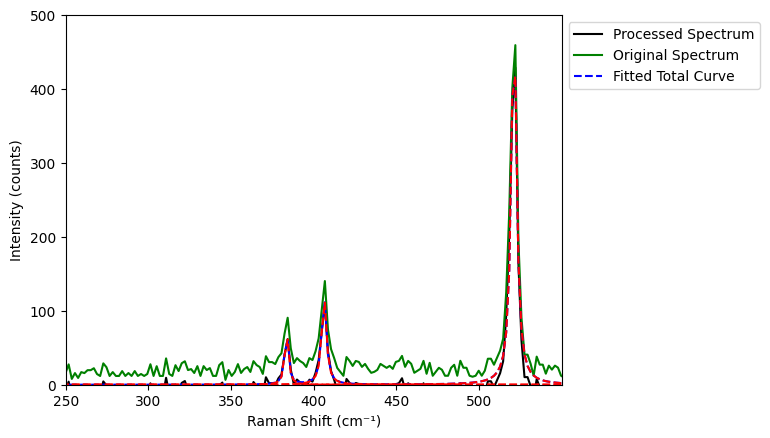

In [2]:
from renishawWiRE import WDFReader
from RamanFit import RamanFit # Import the class instead of the module

# Read data from .wdf file
filename = 'Raman Sample MoS2 2D Flakes.wdf'
reader = WDFReader(filename)

# Focus on Raman shift = 300 to 780 1/cm (index 600 to 900 of the original data)
wavenumber = reader.xdata[300:780]  
spectra = reader.spectra[300:780]

# Instantiate the RamanFit class
raman_fit = RamanFit(spectra, wavenumber,
                     materials=['MoS2'],        # Load materials, if no materials are provided, then WS2 is fitted
                     substrate='Si',            # Default substrate is Si (SiO2)
                     normalize=False,           # Normalize your peak intensity, if needed
                     background_remove=True,    # If your Raman contains needs remove background intensity, use this
                     smoothing=True,            # Smooth too noisy signal, only if needed
                     smooth_order=10            # smooth_order in range 1 to 10, where 1 means the strongest smooth
                     )

# Update the fitting bounds 
bounds_dict = {
    'E12g'  :   ([380, 0, 0], [385, 3, 10]),
    'A1g'   :   ([404, 0, 0], [408, 3, 20]),
    'Si'    :   ([520, 0, 0], [525, 2, 30])
}
raman_fit.update_bounds(**bounds_dict)

# Remove Unecessary peaks
raman_fit.remove_peaks('2LA(M)','2E1g','E22g+LA(M)','A12g+LA(M)')

# Perform the fitting
params, params_cov = raman_fit.fit_spectrum()

# Plot the results with an offset and scale
xlim = [250, 550]
raman_fit.plot_fit(params,                      # The Lorentzian parameters fitted 
                   offset=0, scale=1,           # Plot offset or scale of fitted curve relative to raw data
                   x_lim=xlim, y_lim=[0,500],  # set x-y axis limits
                
                   # set x-axis ticks
                   x_ticks=range(xlim[0],xlim[1],50)
                   )